In [33]:
%matplotlib inline

In [1]:
import ROOT as R
import numpy as np

Welcome to JupyROOT 6.22/00


In [21]:
import os
import matplotlib.pyplot as plt

In [56]:
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/rsd_2021_12/pulses'
FILES_IN = [os.path.join(DIR_IN, path) for path in [
    'centroide_1_240-285.txt', 'centroide_2_250-274.txt', 'centroide_3_260-263.txt',
    'centroide_4_270-251.txt', 'centroide_5_280-240.txt', 'centroide_6_260-240.txt',
    'centroide_7_240-240.txt', 'centroide_8_240-263.txt', 'centroide_9_260-285.txt',
    'centroide_10_280-285.txt', 'centroide_11_280-263.txt', 'centroide_12_260-251.txt',
]]

Position: 240.0:285.0
Position: 250.0:274.0
Position: 260.0:263.0
Position: 270.0:251.0
Position: 280.0:240.0
Position: 260.0:240.0
Position: 240.0:240.0
Position: 240.0:263.0
Position: 260.0:285.0
Position: 280.0:285.0
Position: 280.0:263.0
Position: 260.0:251.0


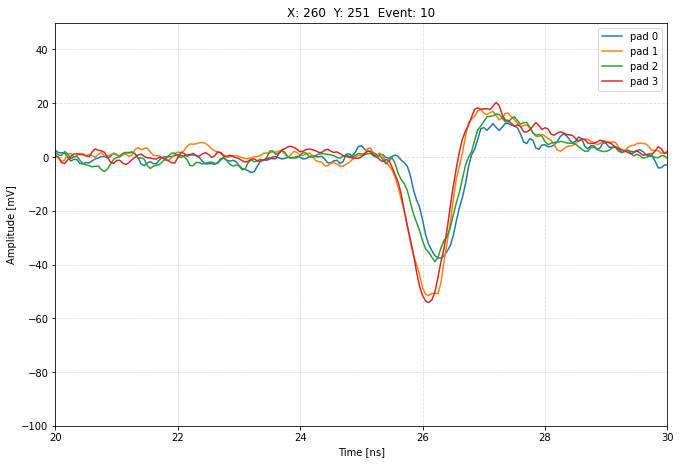

In [68]:
pulses = [None for i in range(4)]
pos = None
MAX_EVENT = 10
# Setting up the figure
fig, ax0 = plt.subplots(1, 1, figsize=(10,7))
fig.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1)
# fig.tight_layout()
for iF, file_in in enumerate(FILES_IN):
    name = os.path.splitext(os.path.split(file_in)[-1])[0]
    point = int(name.split('_')[-2])
    pos = tuple(float(i) for i in name.split('_')[-1].split('-'))
    print(f'Position: {pos[0]}:{pos[1]}')
    with open(file_in) as fin:
        event = -1
        pulse_id = 0
        for line in fin:
            words = line.split()
            n_words = len(words)
            if n_words < 1:
                continue
            elif n_words == 11:
                if event >= 0:
                    ax0.clear()
                    ax0.set_ylabel('Amplitude [mV]')
                    ax0.set_xlabel('Time [ns]')
                    ax0.set_xlim((20,30))
                    ax0.set_ylim((-100,50))
                    ax0.grid(True, color='gainsboro', linestyle='--', zorder=0)
                    ax0.set_title('X: {0:.0f}  Y: {1:.0f}  Event: {2:d}'.format(pos[0], pos[1], event))
                    xvals = np.array([i*0.05 for i in range(len(pulses[0]))], dtype=np.float32)
                    for pad, pulse in enumerate(pulses):
                        ax0.plot(xvals, pulse,label=f'pad {pad}')
                    plt.legend()
                    out_path = os.path.join(DIR_IN, 'plots', '{3:d}_{0:.0f}_{1:.0f}_e{2:d}.pdf'.format(pos[0], pos[1], event, point))
                    fig.savefig(out_path)
                event = int(words[0])
                pulse_id = 0
            elif n_words == 1002:
                pulses[pulse_id] = np.array([float(w) for w in words], dtype=np.float32)
                pulse_id += 1
            if event > MAX_EVENT:
                break
        

TypeError: savefig() missing 1 required positional argument: 'fname'

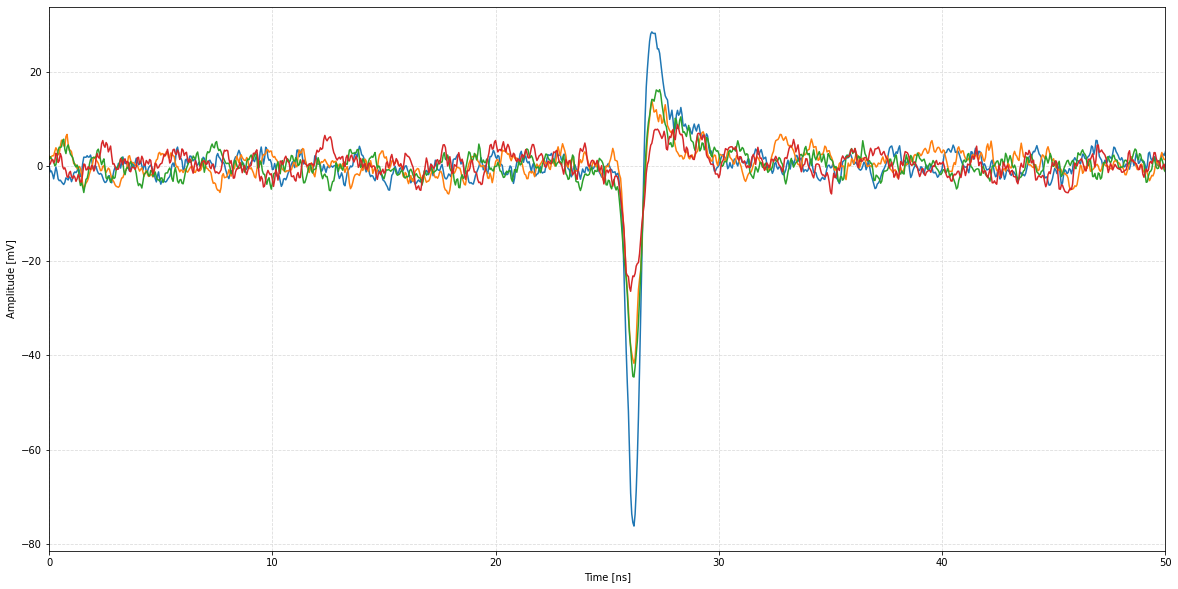